In [29]:
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
import torch
import torchvision

In [3]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT

In [5]:
dir(weights)

['__class__',
 '__doc__',
 '__eq__',
 '__hash__',
 '__module__',
 'get_state_dict',
 'meta',
 'name',
 'transforms',
 'url',
 'value',
 'verify']

In [12]:
weights.transforms()

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [9]:
model = torchvision.models.efficientnet_b0(weights=weights)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /home/dwj/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:00<00:00, 47.4MB/s]


In [10]:
dir(model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_compiled_call_impl',
 '_forward_hooks',
 '_forward_hooks_always_called',
 '_forward_hooks_with_kwargs',
 '_forward_impl',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hoo

In [13]:
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)

In [14]:
model.features

Sequential(
  (0): Conv2dNormActivation(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU(inplace=True)
  )
  (1): Sequential(
    (0): MBConv(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): SiLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (activation): SiLU(inplace=True)
          (scale_activation): Sigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), 

In [15]:
model.avgpool

AdaptiveAvgPool2d(output_size=1)

In [23]:
arr = np.random.randint(0, 256, size=(365, 450, 3), dtype=np.uint8)
img = Image.fromarray(arr, mode="RGB")
print(img.size)
preprocess = weights.transforms()
x = preprocess(img).unsqueeze(0)
with torch.no_grad():
    y = model.features(x)

print("Input tensor shape:", x.shape)
print("Features shape:", y.shape)
print('avgpool shape:', model.avgpool(y).shape)

(450, 365)
Input tensor shape: torch.Size([1, 3, 224, 224])
Features shape: torch.Size([1, 1280, 7, 7])
avgpool shape: torch.Size([1, 1280, 1, 1])


(array([  379.,  3702., 13316., 26687., 33934., 33478., 24420., 11293.,
         3025.,   294.]),
 array([-2.11790395, -1.64211357, -1.16632318, -0.69053268, -0.2147423 ,
         0.26104808,  0.73683858,  1.21262884,  1.68841934,  2.1642096 ,
         2.6400001 ]),
 <BarContainer object of 10 artists>)

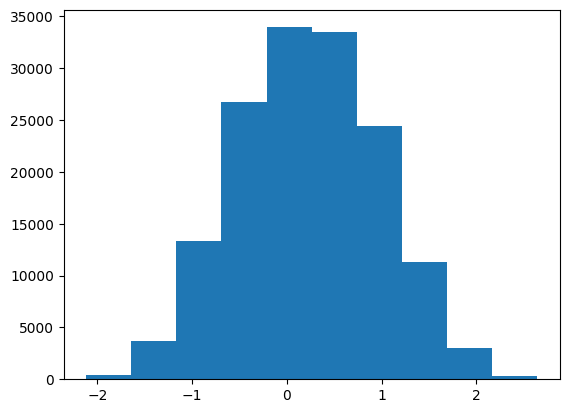

In [30]:
plt.hist(x.numpy().ravel())

In [ ]:
plt.hist(x)

tensor([[[[-0.1828,  1.0673, -0.1143,  ...,  0.6563,  0.9303,  1.4440],
          [-0.0287,  0.2967, -0.1486,  ...,  0.6221, -0.8678,  1.0331],
          [-0.4226,  0.7419,  0.0912,  ...,  0.5707, -0.3198, -1.1589],
          ...,
          [-1.1418,  0.5193, -0.5767,  ..., -0.9363,  0.2453,  0.8104],
          [ 0.0741,  0.6906, -0.2684,  ..., -1.1760,  0.2111,  0.7933],
          [-0.6965, -1.0048, -1.4500,  ...,  0.1426,  1.3413, -0.2171]],

         [[ 1.4482,  1.1155,  1.5007,  ...,  1.7808,  0.6604, -0.1625],
          [ 1.6758,  0.4328,  0.2227,  ...,  1.1155,  1.6758,  0.6604],
          [-0.4426, -0.3901, -0.6176,  ...,  0.9405,  1.5532,  0.2402],
          ...,
          [-0.0049,  1.3431,  0.1176,  ..., -0.0749,  0.3102, -0.0749],
          [-0.4951, -0.4601,  1.0105,  ...,  0.2402,  0.2052,  0.5028],
          [-0.3550,  0.3627,  0.7654,  ..., -0.7927,  1.2731,  1.4307]],

         [[ 0.4439,  2.0125,  0.4788,  ..., -0.3927,  0.8622,  0.7228],
          [-0.1835,  1.2980,  